## Demonstrating effect of bandpass with human freq

### Set up

In [62]:
import plot_utils
import utils
import filter
from conv_kernel import conv_kernel
import torch

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### frequency domain filter

(224, 224)


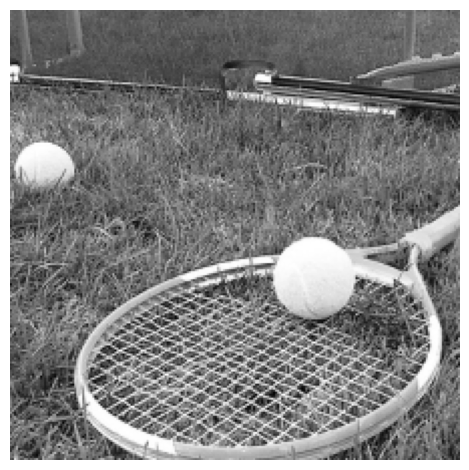

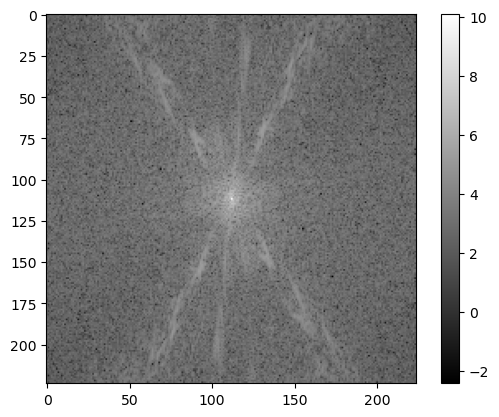

In [131]:
toy_img = utils.read_image('data/demo.JPEG', gray=True, to_float=True, imagenet_transform=True)
print(toy_img.shape)
plot_utils.im_show(toy_img)

img_spectrum = filter.get_image_freq(toy_img)
plot_utils.plot_spectrum(img_spectrum)

(159,)


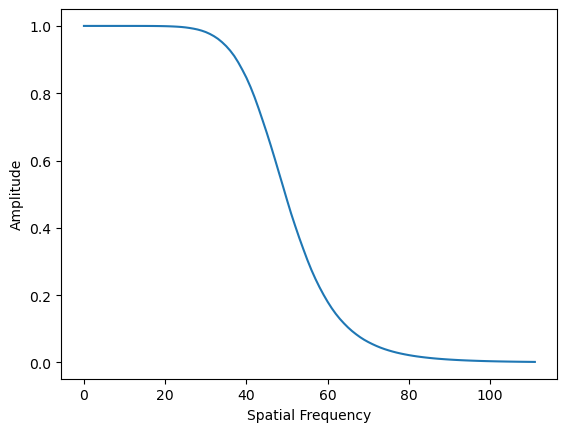

(159,)


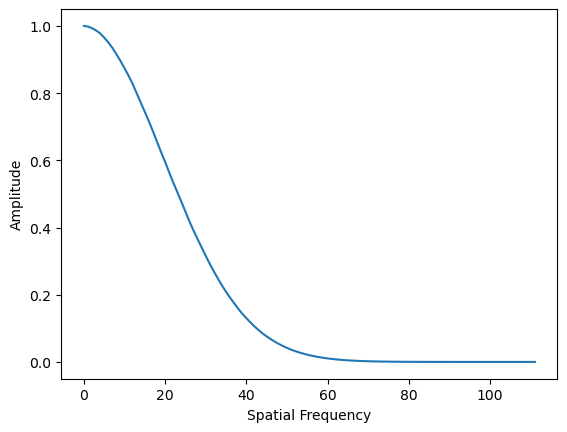

In [43]:
butterworth_lower = filter.butterworth_filter(toy_img.shape, cutoff=50, order = 4)
plot_utils.plot_freq_amplitude(butterworth_lower)
gaussian_lower = filter.gaussian_filter(toy_img.shape, sigma=20)
plot_utils.plot_freq_amplitude(gaussian_lower)

(159,)


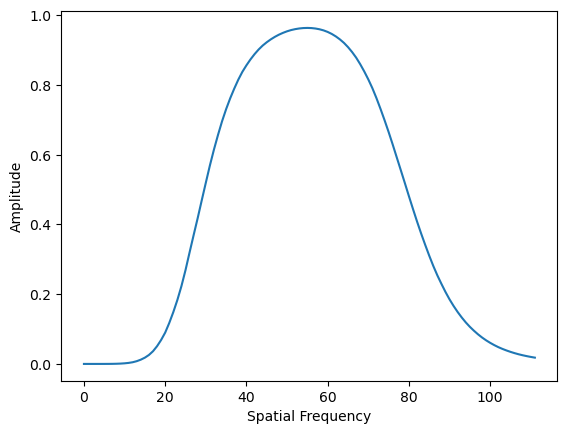

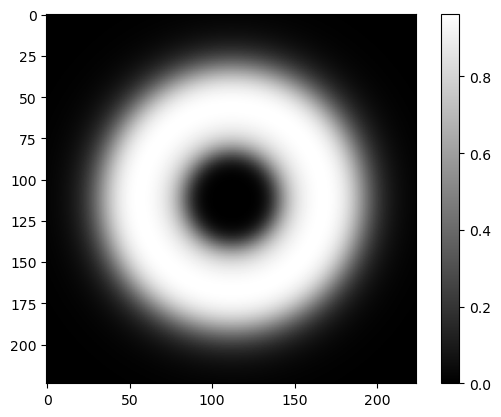

(159,)


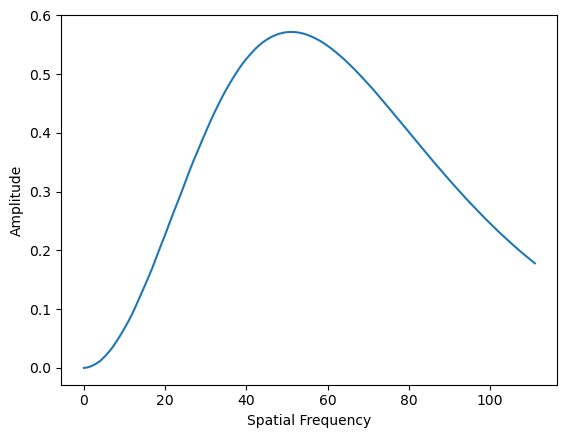

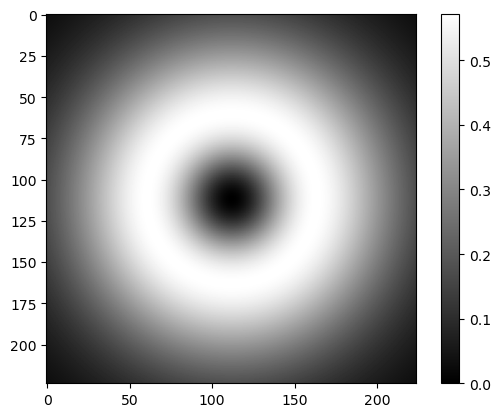

In [51]:
dob = filter.DoB_filter(toy_img.shape, cutoff_low=30, cutoff_high=80, order_low=3, order_high=6)
plot_utils.plot_freq_amplitude(dob)
plot_utils.plot_spectrum(dob)

dog = filter.DoG_filter(toy_img.shape, sigma_low=25, sigma_high=60)
plot_utils.plot_freq_amplitude(dog)
plot_utils.plot_spectrum(dog)

/Users/zhenanshao/Documents/git_repos/human-vis-freq-align/filter.py:63: RuntimeWarning: divide by zero encountered in log
  H = 1 - np.exp(-D**2 / (2 * cutoff**2))


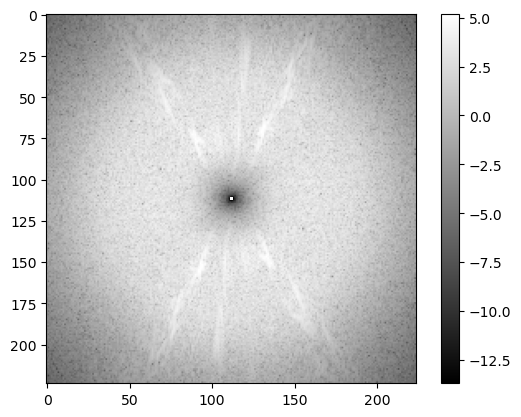

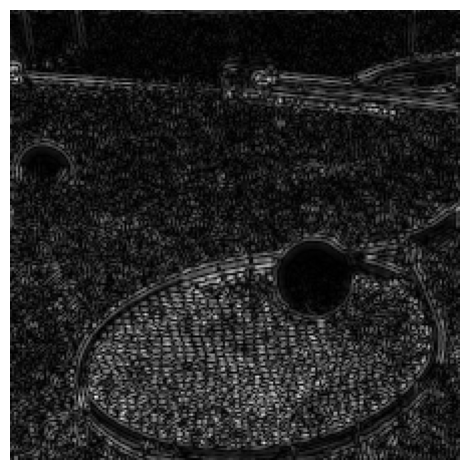

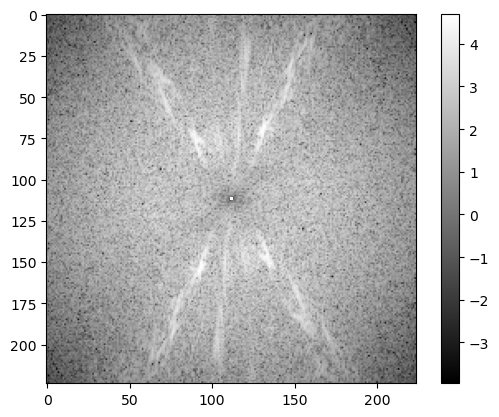

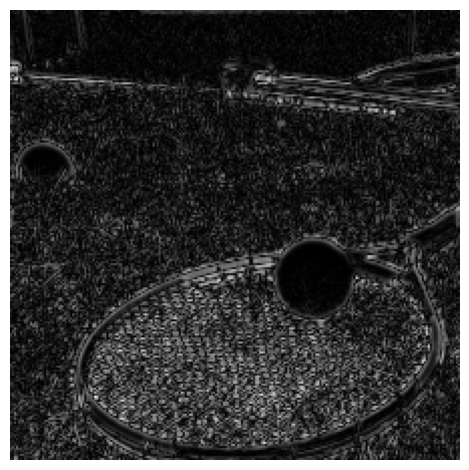

In [52]:
dob_img, filtered_spectrum_dob = filter.filter_image_infreq(toy_img, dob)
plot_utils.plot_spectrum(filtered_spectrum_dob)
plot_utils.im_show(dob_img)

dog_img, filtered_spectrum_dog = filter.filter_image_infreq(toy_img, dog)
plot_utils.plot_spectrum(filtered_spectrum_dog)
plot_utils.im_show(dog_img)

### Spatial domain conv kernel

In [150]:
lower_cutoff = 30  # cycles per image
lower_cutoff/= 224.

higher_cutoff = 80
higher_cutoff /= 224.

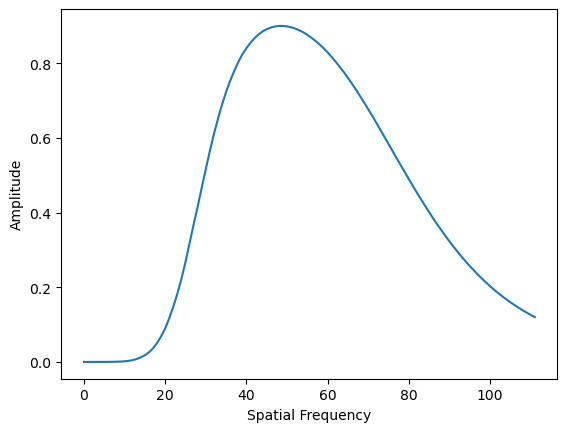

/Users/zhenanshao/Documents/git_repos/human-vis-freq-align/filter.py:63: RuntimeWarning: divide by zero encountered in log
  filtered_spectrum = np.log(np.abs(Fshift))


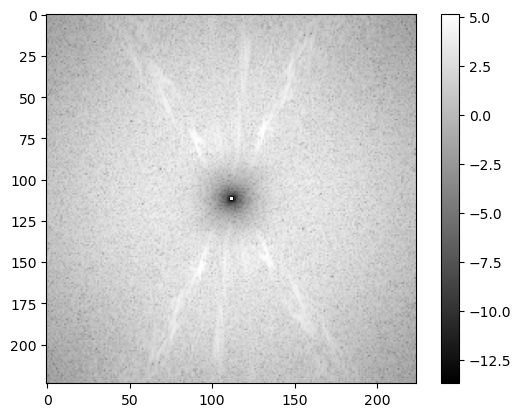

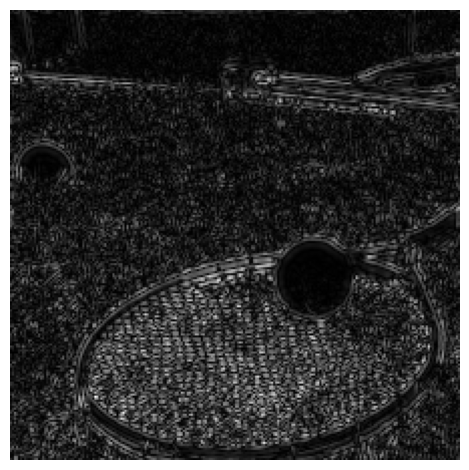

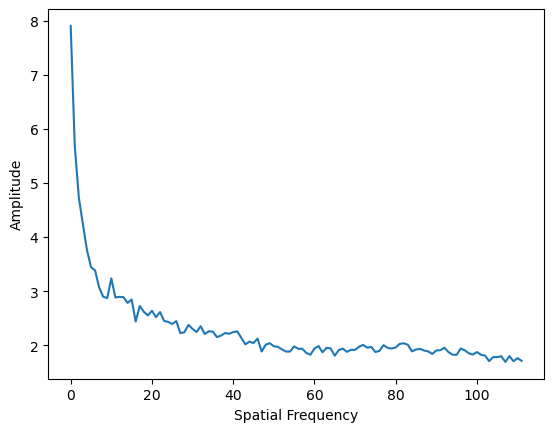

In [151]:
freq_fil = filter.DoB_filter(toy_img.shape, lower_cutoff * 224., higher_cutoff * 224., 3, 3)
# freq_fil = filter.butterworth_filter(toy_img.shape, lower_cutoff * 224., 3)

plot_utils.plot_freq_amplitude(freq_fil)

fil_img, filtered_spectrum_dob = filter.filter_image_infreq(toy_img, freq_fil)
plot_utils.plot_spectrum(filtered_spectrum_dob)
plot_utils.im_show(fil_img)
plot_utils.plot_freq_amplitude(filter.get_image_freq(fil_img))


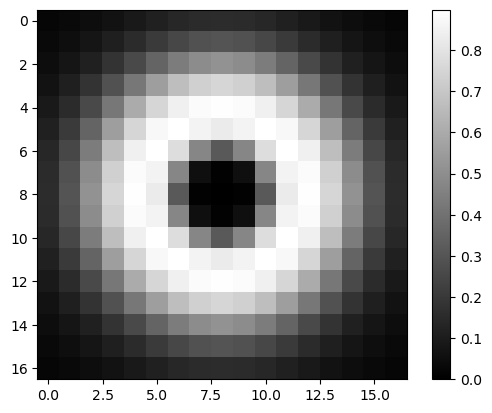

Kernel(
  (conv): Conv2d(1, 1, kernel_size=(17, 17), stride=(1, 1), padding=(8, 8), bias=False, padding_mode=circular)
)


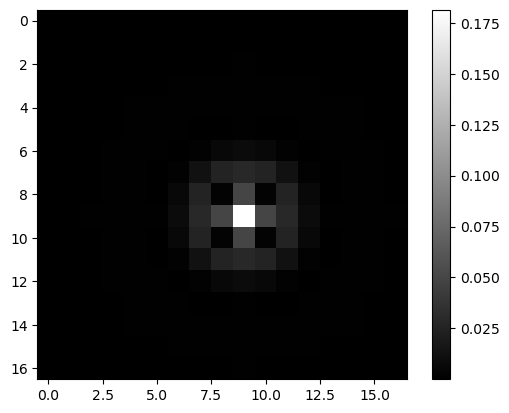

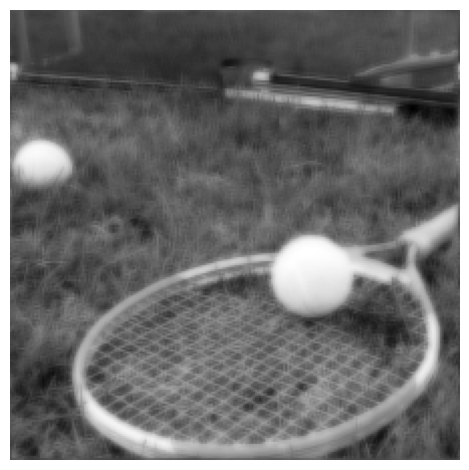

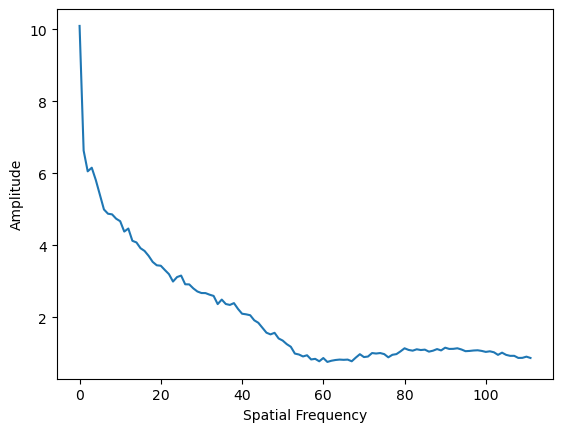

In [152]:
kernel_size = 17
num_channel = 1

freq_fil = filter.DoB_filter((kernel_size, kernel_size), lower_cutoff * kernel_size, higher_cutoff * kernel_size, 3, 3)
# freq_fil = filter.butterworth_filter((kernel_size, kernel_size), lower_cutoff * kernel_size, 3)
plot_utils.plot_spectrum(freq_fil)

model, spatial_filter = conv_kernel(freq_fil, kernel_size, num_channel)
plot_utils.plot_spectrum(spatial_filter)


toy_img_tensor = torch.tensor(toy_img).unsqueeze(0).unsqueeze(0)
output = model(toy_img_tensor).squeeze(0).squeeze(0).numpy()

plot_utils.im_show(output)
plot_utils.plot_freq_amplitude(filter.get_image_freq(output))
